<a href="https://colab.research.google.com/github/SanyamSwami123/AI-mini-projects/blob/main/Data%20Science/DSExtra/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related.

### Question 1
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# # pip install xlrd>=1.2.0
# !pip install --upgrade pandas
# !pip install --upgrade openpyxl

In [ ]:
!pip uninstall xlrd

In [109]:
!pip install xlrd

In [69]:
# energy.shape
265-245


20

In [70]:
import pandas as pd
energy = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Energy Indicators.xls', skiprows=17)[:227]
energy.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Petajoules,Gigajoules,%
0,NaN,Afghanistan,Afghanistan,321,10,78.66928
1,NaN,Albania,Albania,102,35,100.00000


In [71]:
energy.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Petajoules', 'Gigajoules',
       '%'],
      dtype='object')

In [72]:
# df
# energy.shape
energy = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Energy Indicators.xls')
energy.head(2)
'''drop and rename the columns''' 
energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] # another way to rename the columns
# energy.columns
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Environmental Indicators: Energy,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Energy Supply and Renewable Electricity Produc...,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Last update: December 2015


In [ ]:
#to  check values of energy 
# energy.iloc[:, 1].values
energy['Energy Supply']*=1000000
energy['Energy Supply'].values

In [ ]:
import numpy as np
# missing value
energy.isnull().sum()
# For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values
# energy.Country.replace('...', np.NaN)
# energy.Country.values
# energy.Country.loc[energy['Country'].isin(['...'])]

In [ ]:
# df
# energy.shape
energy = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Energy Indicators.xls')
energy.head(2)
'''drop and rename the columns''' 
energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] # another way to rename the columns
# energy.columns
energy.head()
# "Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"
energy.replace({'Country':{"Republic of Korea": "South Korea", "United States of America": "United States"
                      , "United Kingdom of Great Britain and Northern Ireland": "United Kingdom"
                      , "China, Hong Kong Special Administrative Region": "Hong Kong"}}, inplace= True, )
# energy.columns.values

In [ ]:
# energy.Country.values
energy['Country'].value_counts()

In [ ]:
energy.dtypes
energy.Country= energy.Country.str.replace(r'[0-9]+','')
energy.replace({'Country':{"Republic of Korea": "South Korea", "United States of America": "United States"
                      , "United Kingdom of Great Britain and Northern Ireland": "United Kingdom"
                      , "China, Hong Kong Special Administrative Region": "Hong Kong"}}, inplace= True)
energy.Country.values

In [ ]:
'''There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,

e.g.

'Bolivia (Plurinational State of)' should be 'Bolivia',

'Switzerland17' should be 'Switzerland'.'''
energy.Country= energy.Country.str.replace(r'\(.*\)','')
energy.Country.values

In [ ]:
import pandas as pd
energy = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Energy Indicators.xls', skiprows=17)[:227]
energy.head(2)

In [ ]:
import numpy as np
def Read_Energy():
  '''drop and rename the columns''' 
  energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
  energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] # another way to rename the columns
  '''Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)'''
  energy['Energy Supply']*=1000000
  '''For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values'''
  energy.Country.replace('...', np.NaN)
  '''Removing the prifix and suffix from the country column so that renaming can be possible'''
  energy.Country= energy.Country.str.replace(r'[0-9]+','')
  '''Rename the following list of countries'''
  energy.replace({'Country':{"Republic of Korea": "South Korea", "United States of America": "United States"
                      , "United Kingdom of Great Britain and Northern Ireland": "United Kingdom"
                      , "China, Hong Kong Special Administrative Region": "Hong Kong"}}, inplace= True)
 
  """There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,
  e.g. Bolivia (Plurinational State of) should be 'Bolivia,
  Switzerland17 should be 'Switzerland."""
  energy.Country= energy.Country.str.replace(r'\(.*\)','')
  return energy

In [ ]:
Read_Energy()

In [ ]:
gdf= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/world_bank.csv', skiprows=4)
gdf.head(2)

In [ ]:
# GDP_df.rename('')
# gdf.replace({'Country Name':{"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran",
                                            #  "Hong Kong SAR, China": "Hong Kong"}}, inplace=True)
# gdf['Country Name'].values
gdf.replace('Country Name', 'Country')

In [ ]:
"""
Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"
"""
def GDP():
  gdf= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/world_bank.csv', skiprows=5, )
  gdf.replace()
  gdf.replace({'Country Name':{"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran",
                                             "Hong Kong SAR, China": "Hong Kong"}}, inplace=True)
  return gdf 

In [ ]:
GDP()

In [110]:
import numpy as np
import pandas as pd

In [111]:
def Read_Energy():
  energy = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Energy Indicators.xls', skiprows=17)[:227]
  energy.head(2)
  '''drop and rename the columns''' 
  energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
  energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] # another way to rename the columns
  '''Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)'''
  energy['Energy Supply']*=1000000
  '''For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values'''
  energy.Country.replace('...', np.NaN)
  '''Removing the prifix and suffix from the country column so that renaming can be possible'''
  energy.Country= energy.Country.str.replace(r'[0-9]+','')
  '''Rename the following list of countries'''
  energy.replace({'Country':{"Republic of Korea": "South Korea", "United States of America": "United States"
                      , "United Kingdom of Great Britain and Northern Ireland": "United Kingdom"
                      , "China, Hong Kong Special Administrative Region": "Hong Kong"}}, inplace= True)
 
  """There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,
  e.g. Bolivia (Plurinational State of) should be 'Bolivia,
  Switzerland17 should be 'Switzerland."""
  energy.Country= energy.Country.str.replace(r'\(.*\)','')
  return energy

"""
Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"
"""
def Read_GDP():
  gdf= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/world_bank.csv', skiprows=4)
  gdf.rename(columns={'Country Name':'Country'}, inplace=True)
  gdf.replace({'Country':{"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran",
                                             "Hong Kong SAR, China": "Hong Kong"}}, inplace=True)
  return gdf 

"""
Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering 
and Power Technology from the file scimagojr-3.xlsx, which ranks countries based 
on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset 
(using the intersection of country names). Use only the last 10 years (2006-2015) 
of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should 
be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations
 per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries.
"""
def Read_Sciamgo():
  ScimEn= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/scimagojr-3.xlsx')
  return  ScimEn

In [112]:
def answer_one():
  energy= Read_Energy() 
  gdp= Read_GDP()
  ScimEn= Read_Sciamgo()
  df= pd.merge(energy, gdp, on='Country', how='inner')
  df= df.merge(ScimEn, on='Country', how='inner')
  df.set_index('Country', inplace=True)
  df=df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
              'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita'
              , '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012'
              , '2013', '2014', '2015']]
  return df[df['Rank']<16] 

In [113]:
answer_one()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Australia,14,8831,8725,90765,15606,10.28,107,5386000000,231,11.810810,1.021940e+12,1.060340e+12,1.099640e+12,1.119650e+12,1.142250e+12,1.169430e+12,1.211910e+12,1.241480e+12,1.272520e+12,1.301250e+12
Brazil,15,8668,8596,60702,14396,7.00,86,12149000000,59,69.648030,1.845080e+12,1.957120e+12,2.056810e+12,2.054210e+12,2.208870e+12,2.295240e+12,2.339210e+12,2.409740e+12,2.412230e+12,2.319420e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,1.564470e+12,1.596740e+12,1.612710e+12,1.565140e+12,1.613410e+12,1.664090e+12,1.693130e+12,1.730690e+12,1.773490e+12,1.792610e+12
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,3.992330e+12,4.559040e+12,4.997780e+12,5.459250e+12,6.039660e+12,6.612490e+12,7.124980e+12,7.672450e+12,8.230120e+12,8.798000e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,2.607840e+12,2.669420e+12,2.674640e+12,2.595970e+12,2.646990e+12,2.702030e+12,2.706970e+12,2.722570e+12,2.729630e+12,2.761190e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,3.332890e+12,3.441560e+12,3.478810e+12,3.283340e+12,3.417300e+12,3.542370e+12,3.556720e+12,3.567320e+12,3.624390e+12,3.685560e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,1.265890e+12,1.374870e+12,1.428360e+12,1.549480e+12,1.708460e+12,1.821870e+12,1.924240e+12,2.051980e+12,2.200620e+12,2.367210e+12
Italy,11,10964,10794,111850,26661,10.20,106,6530000000,109,33.667230,2.202170e+12,2.234630e+12,2.211150e+12,2.089940e+12,2.125180e+12,2.137440e+12,2.077180e+12,2.040870e+12,2.033870e+12,2.049320e+12
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,5.496540e+12,5.617040e+12,5.558530e+12,5.251310e+12,5.498720e+12,5.473740e+12,5.569100e+12,5.644660e+12,5.642880e+12,5.669560e+12


In [ ]:
  energy= Read_Energy() 
  gdp= Read_GDP()
  ScimEn= Read_Sciamgo()
  df= pd.merge(energy, gdp, on='Country', how='inner')
  df= df.merge(ScimEn, on='Country', how='inner')
  # df.set_index('Country', inplace=True)
  # df=df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
  #             'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita'
  #             , '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012'
  #             , '2013', '2014', '2015']]
  # df[df['Rank']<16]
  df

### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [ ]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [114]:
def answer_two():
  energy= Read_Energy() 
  gdp= Read_GDP()
  ScimEn= Read_Sciamgo()
  df= pd.merge(energy, gdp, on='Country', how='outer')
  df= df.merge(ScimEn, on='Country', how='outer')
  df2= pd.merge(energy, gdp, on='Country', how='inner')
  df2= df2.merge(ScimEn, on='Country', how='inner')
  return len(df)-len(df2)

In [115]:
answer_two()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


163

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [ ]:
Top15 = answer_one()
Top15
# avgGDP= Top15[['2006','2007', '2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)
# avgGDP

In [116]:
def answer_three():
    Top15 = answer_one()
    # avgGDP=Top15.groupby('Country')[['2006','2007', '2008','2009','2010','2011','2012','2013','2014','2015']].mean()
    avgGDP= Top15[['2006','2007', '2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)
    return avgGDP.sort_values(axis=0, ascending=False)

In [117]:
answer_three()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


Country
United States         1.536435e+13
China                 6.348610e+12
Japan                 5.542208e+12
Germany               3.493026e+12
France                2.681725e+12
United Kingdom        2.487905e+12
Brazil                2.189793e+12
Italy                 2.120175e+12
India                 1.769298e+12
Canada                1.660648e+12
Russian Federation    1.565459e+12
Spain                 1.418079e+12
Australia             1.164041e+12
South Korea           1.106715e+12
dtype: float64

### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [ ]:
Top15 = answer_one()
Top15
LGDP= answer_three().index[5]
LGDP

# target = answer_three().index[5]
# target   

In [118]:
def answer_four():
    Top15 = answer_one()
    TGDP= answer_three().index[5]
    return Top15.loc[TGDP, '2015'] - Top15.loc[TGDP, '2006']

In [ ]:
answer_four()

### Question 5
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [ ]:
Top15= answer_one()
Top15['Energy Supply per Capita'].mean()


In [119]:
def answer_five():
    Top15 = answer_one()
    return Top15['Energy Supply per Capita'].mean() #??mean(axis=1)

### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [ ]:
Top15 = answer_one()
# Top15.loc[[Top15['% Renewable'].idxmax()], '% Renewable']
(Top15['% Renewable'].idxmax(), Top15['% Renewable'].max())
# Top15

In [120]:
def answer_six():
    Top15 = answer_one()
    # Top15.loc[[Top15['% Renewable'].idxmax()], '% Renewable']
    return (Top15['% Renewable'].idxmax(), Top15['% Renewable'].max())

### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [ ]:
Top15 = answer_one()
# Top15.rename(columns={'Self-citations':'Total Citations'}, inplace=True)
Top15['Ratio Citations']= Top15['Self-citations']/Top15['Citations']
Top15['Ratio Citations'].max(), Top15['Ratio Citations'].idxmax()

In [121]:
def answer_seven():
    Top15 = answer_one()
    Top15['Ratio Citations']= Top15['Self-citations']/Top15['Citations']
    return Top15['Ratio Citations'].max(), Top15['Ratio Citations'].idxmax()

In [ ]:
answer_seven()

### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [ ]:
Top15 = answer_one()
Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
Top15.sort_values('Population', ascending=False).index[2]
# Top15

In [122]:
def answer_eight():
    Top15 = answer_one()
    Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
    return Top15.sort_values('Population', ascending=False).index[2]

### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [145]:
Top15 = answer_one()
Top15['Energy Supply']=np.float64(Top15['Energy Supply'])
Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
Top15['number of citable documents per person']=np.float64(Top15['Citable documents'])/ Top15['Population']
# Top15['number of citable documents per person'].corr(Top15['Energy Supply per Capita'])
# Top15[['number of citable documents per person', 'Energy Supply per Capita']].corr()

return Top15[['number of citable documents per person', 'Energy Supply per Capita']].corr().loc['number of citable documents per person', 'Energy Supply per Capita']

# Top15.info()

0.7901935488300874


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


In [146]:
def answer_nine():
    Top15 = answer_one()
    Top15['Energy Supply']=np.float64(Top15['Energy Supply'])
    Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
    Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
    Top15['number of citable documents per person']=np.float64(Top15['Citable documents'])/ Top15['Population']  
    return Top15[['number of citable documents per person', 'Energy Supply per Capita']].corr().loc['number of citable documents per person', 'Energy Supply per Capita']


In [147]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


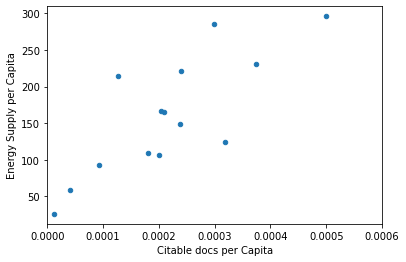

In [148]:
plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [41]:
 Top15 = answer_one()
 median= Top15['% Renewable'].median()
 print(median)
#  print(Top15['% Renewable'][0])
 for i in range(len(Top15)):
   if Top15['% Renewable'][i]>median:
     Top15['% Renewable'][i]=1
   else:
     Top15['% Renewable'][i]=0
 print(Top15['% Renewable'])
#  print(Top15['% Renewable'].apply(lambda x: 1 if x >= median else 0))
#  Top15['% Renewable']>(Top15['% Renewable'].median())
#  print(Top15)
#  print(Top15['% Renewable'].value_counts())


17.15448
Country
Australia             0.0
Brazil                1.0
Canada                1.0
China                 1.0
France                0.0
Germany               1.0
India                 0.0
Italy                 1.0
Japan                 0.0
South Korea           0.0
Russian Federation    1.0
Spain                 1.0
United Kingdom        0.0
United States         0.0
Name: % Renewable, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [149]:
def answer_ten():
  Top15 = answer_one()
  median= Top15['% Renewable'].median()
 #1st method using traditional way
  # for i in range(len(Top15)):
  #   if Top15['% Renewable'][i]>median:
  #     Top15['% Renewable'][i]=1
  #   else:
  #     Top15['% Renewable'][i]=0
  # 2nd method
  Top15['HighRenew']=Top15['% Renewable'].apply(lambda x: 1 if x >= median else 0)
  return Top15['HighRenew']

In [150]:
answer_ten()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


Country
Australia             0
Brazil                1
Canada                1
China                 1
France                0
Germany               1
India                 0
Italy                 1
Japan                 0
South Korea           0
Russian Federation    1
Spain                 1
United Kingdom        0
United States         0
Name: HighRenew, dtype: int64

### Question 11
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [193]:
  Top15 = answer_one()
  Top15['Energy Supply']=np.float64(Top15['Energy Supply'])
  Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
  Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
  ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
  Top15['Continent']= pd.Series(data=ContinentDict)
  grp_continent= Top15.groupby('Continent')
  # a= pd.DataFrame(grp_continent)
  df = pd.DataFrame([grp_continent['Rank'].count(), grp_continent['Population'].sum(),
                       grp_continent['Population'].mean(), grp_continent['Population'].std()])
  # df.columns = ['size', 'sum', 'mean', 'std']
  df
  # Top15
   # df= Top15.groupby('Continent')
  # print(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


Continent,Asia,Australia,Europe,North America,South America
Rank,4.000000e+00,1.000000e+00,6.000000e+00,2.000000e+00,1.000000e+00
Population,2.821591e+09,2.331602e+07,4.579297e+08,3.528552e+08,2.059153e+08
Population,7.053977e+08,2.331602e+07,7.632161e+07,1.764276e+08,2.059153e+08
Population,7.138779e+08,NaN,3.464767e+07,1.996696e+08,NaN


In [194]:
def answer_eleven():
  Top15 = answer_one()
  Top15['Energy Supply']=np.float64(Top15['Energy Supply'])
  Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
  Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
  ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
  Top15['Continent']= pd.Series(data=ContinentDict)
  grp_continent= Top15.groupby('Continent')
  # a= pd.DataFrame(grp_continent)
  df = pd.DataFrame([grp_continent['Rank'].count(), grp_continent['Population'].sum(),
                       grp_continent['Population'].mean(), grp_continent['Population'].std()])
  df.columns = ['size', 'sum', 'mean', 'std']
  return df

### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [175]:
Top15 = answer_one()
Top15
Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
ContinentDict  = {'China':'Asia', 
                'United States':'North America', 
                'Japan':'Asia', 
                'United Kingdom':'Europe', 
                'Russian Federation':'Europe', 
                'Canada':'North America', 
                'Germany':'Europe', 
                'India':'Asia',
                'France':'Europe', 
                'South Korea':'Asia', 
                'Italy':'Europe', 
                'Spain':'Europe', 
                'Iran':'Asia',
                'Australia':'Australia', 
                'Brazil':'South America'}
Top15['Continent']= pd.Series(data=ContinentDict)
Top15['% Renewable bins']=pd.cut(Top15['% Renewable'], 5)
Top15.groupby(['Continent', '% Renewable bins'])['Rank'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


Continent      % Renewable bins
Asia           (2.212, 15.753]     3
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
Name: Rank, dtype: int64

In [178]:
def answer_twelve():
  Top15 = answer_one()
  Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
  ContinentDict  = {'China':'Asia', 
                'United States':'North America', 
                'Japan':'Asia', 
                'United Kingdom':'Europe', 
                'Russian Federation':'Europe', 
                'Canada':'North America', 
                'Germany':'Europe', 
                'India':'Asia',
                'France':'Europe', 
                'South Korea':'Asia', 
                'Italy':'Europe', 
                'Spain':'Europe', 
                'Iran':'Asia',
                'Australia':'Australia', 
              'Brazil':'South America'}
  Top15['Continent']= pd.Series(data=ContinentDict)
  Top15['% Renewable bins']=pd.cut(Top15['% Renewable'], 5)
  return Top15.groupby(['Continent', '% Renewable bins'])['Rank'].count()

### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [186]:
# def fun(a):
#   for i in range(len(a)):
#     a
print('{:,}'.format(23316017.316017))

23,316,017.316017


In [191]:
Top15['Energy Supply']=np.float64(Top15['Energy Supply'])
Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
Top15['Population'].apply(lambda x:'{:,}'.format(x))
# Top15['Population']

Country
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Canada                  35,239,864.86486486
China                 1,367,645,161.2903225
France                  63,837,349.39759036
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
Italy                  59,908,256.880733944
Japan                  127,409,395.97315437
South Korea            49,805,429.864253394
Russian Federation            143,500,000.0
Spain                    46,443,396.2264151
United Kingdom         63,870,967.741935484
United States          317,615,384.61538464
Name: Population, dtype: object

In [195]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['Energy Supply']=np.float64(Top15['Energy Supply'])
    Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
    Top15['Population']= Top15['Energy Supply']/ Top15['Energy Supply per Capita']
    return Top15['Population'].apply(lambda x:'{:,}'.format(x))

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
#plot_optional()

#### Solutions

Hope learnt something new while doing this assigment. You can find the solutions [here](Assignment_2Solution.ipynb).